In [8]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'iris-flower-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17860%2F23404%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T194240Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D68ba24a18fc0a76aa41fc09d311f3607f30ec2db961593ef9e4846e95669f56ae044b73639da84d0e70a6779fbd47dbaff3ca4d7e891cf21edebaedc772f6f5ec87d9c0c59bc614bd3f04f739914677008066317ac1320c975a01174ad8ce6b3b902cbb73afb3dc40a2a005ca86131097481b7095a331f4c5d84bc0a89a9fd9cfd6f7bd3abbabbb303c60097c38cd4880ebe356eae073f52fe03f1cd3bb5be15d07c8469042263dadf433c0feef8040b7b7a9e019dd2dc399c494e17baca32c68993925989ff06e38846b82a3668b0fccad5635705b20de2e4d3ec97588ce9f10b6d41a37938a184269de637126412a42eacf382bd2469fe78d261e61ab685a2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1010 bytes downloaded
Downloaded and uncompressed: iris-flower-dataset
Data source import complete.


## **Import Libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

## **Read CSV file**

In [10]:
df=pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/IRIS.csv");

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
df.shape

(150, 5)

In [14]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


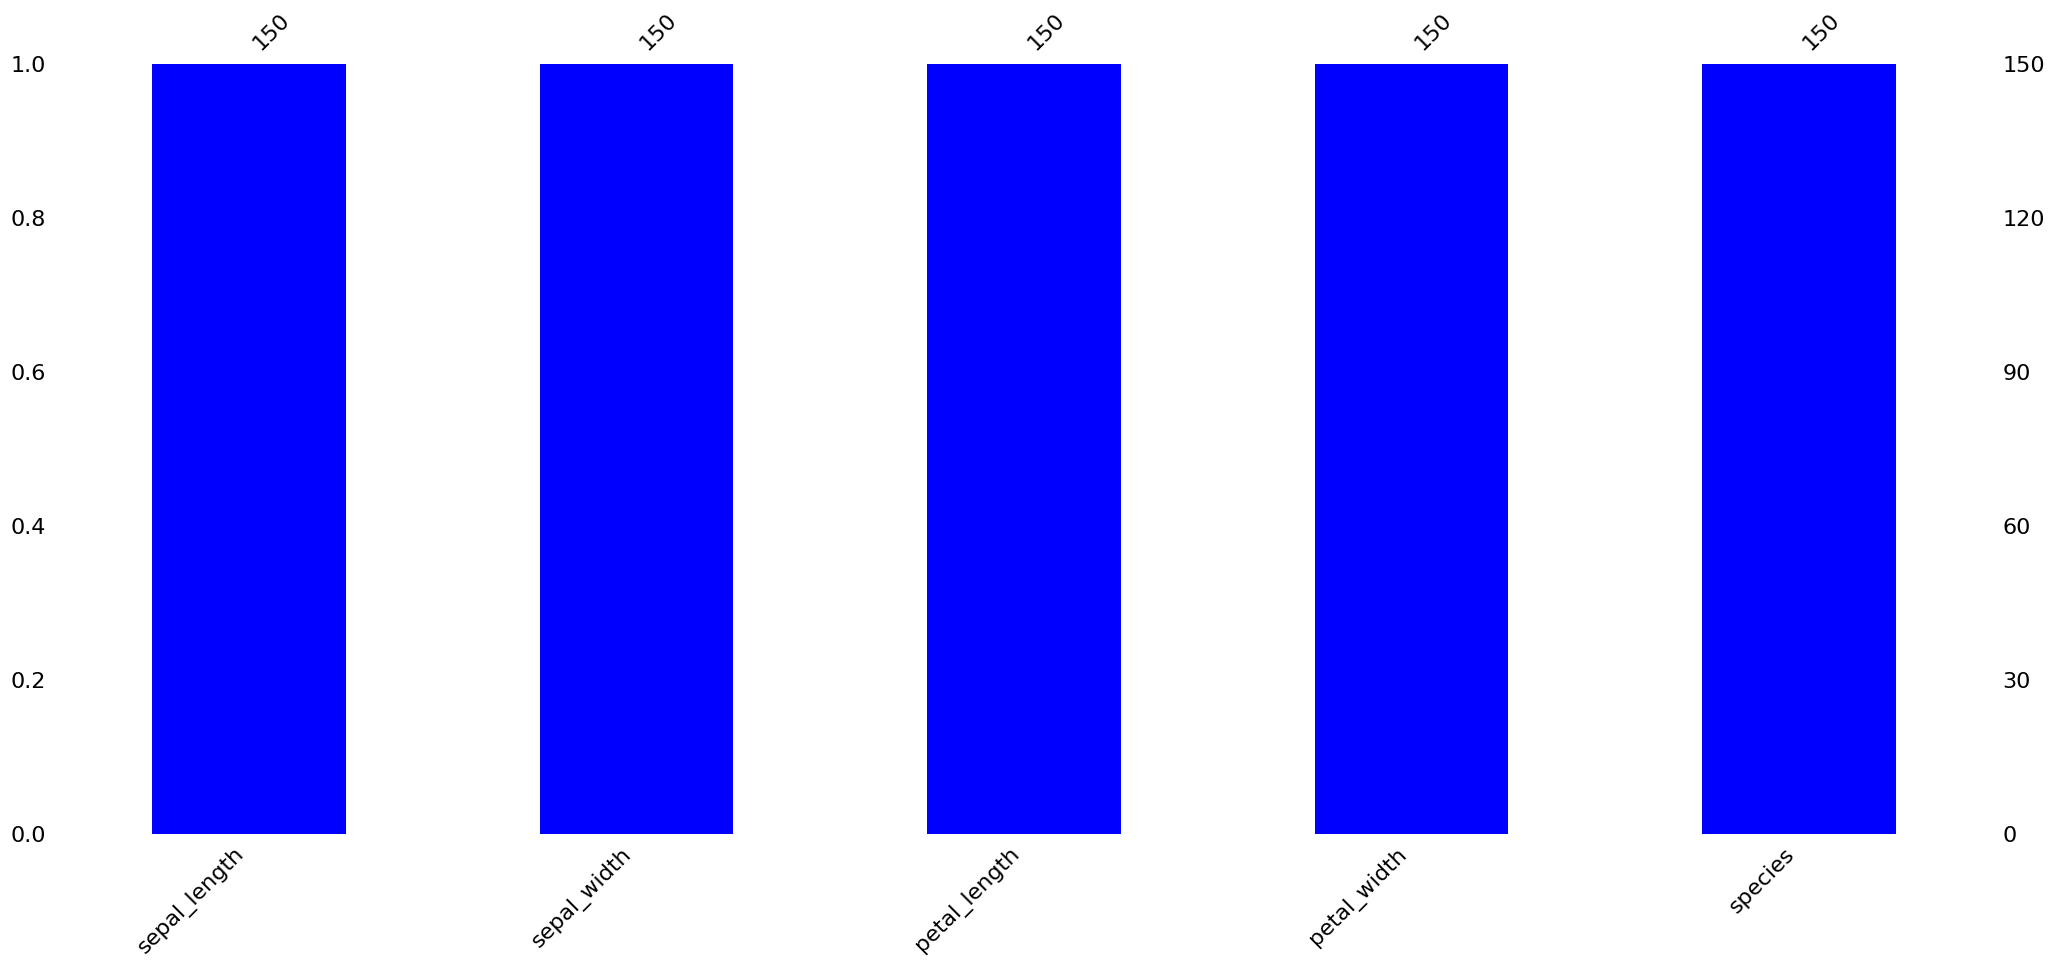

In [16]:
msn.bar(df,color='blue');

In [26]:
df.corr();

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
df['species']=df['species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## **Data Visualization**



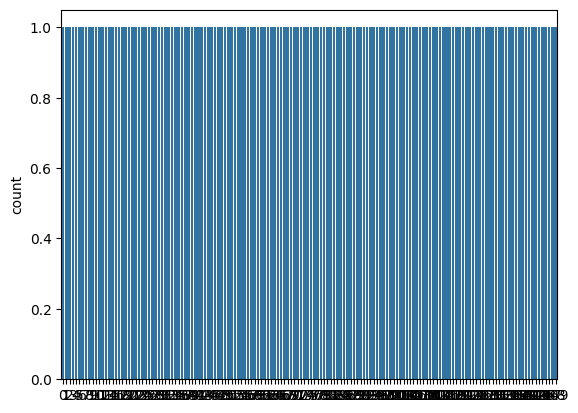

In [23]:
sns.countplot(df['species']);

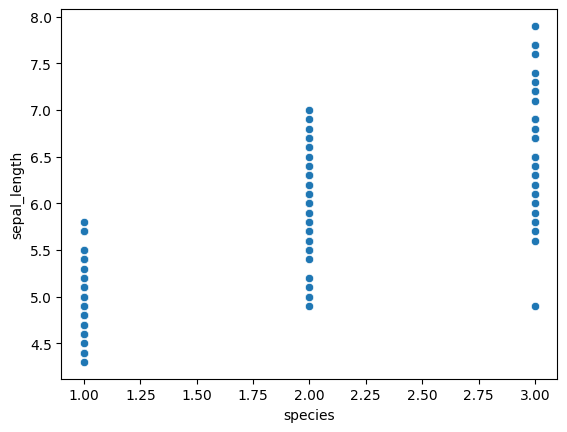

In [30]:
sns.scatterplot(x='species', y='sepal_length', data=df);
# Pass x and y as keyword arguments and specify the data source

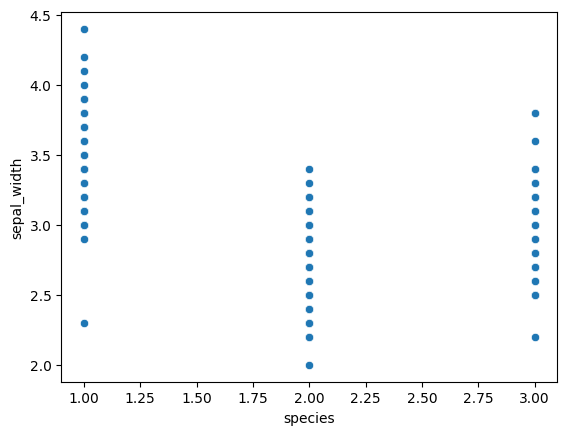

In [32]:
sns.scatterplot(x=df['species'], y=df['sepal_width']);
# Pass 'species' and 'sepal_width' as keyword arguments 'x' and 'y' respectively

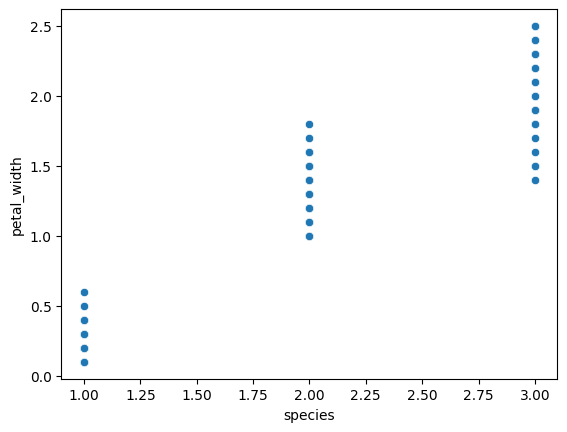

In [33]:
sns.scatterplot(x=df['species'],y=df['petal_width']);

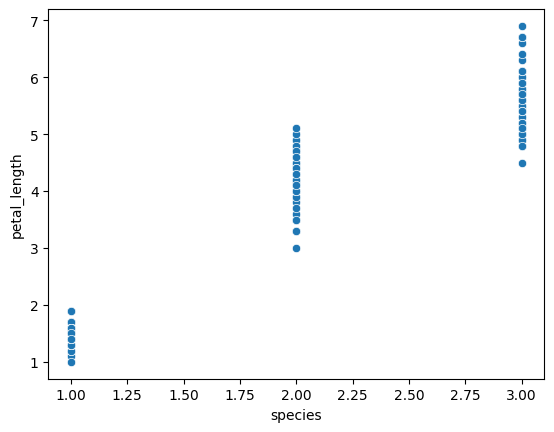

In [34]:
sns.scatterplot(x=df['species'],y=df['petal_length']);

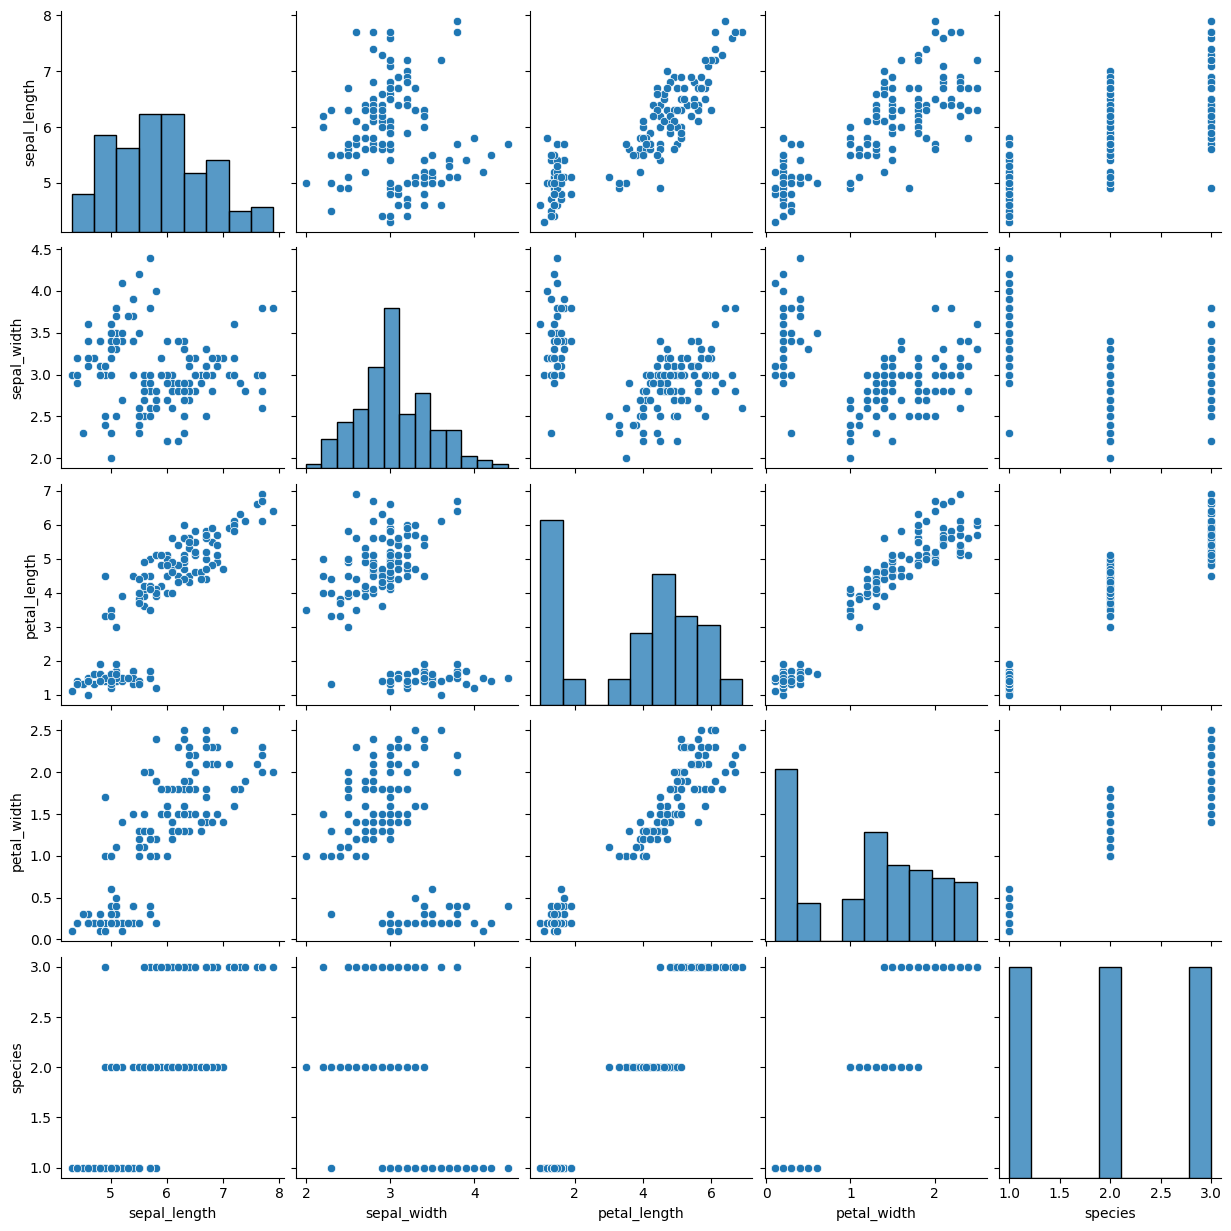

In [35]:
sns.pairplot(df);

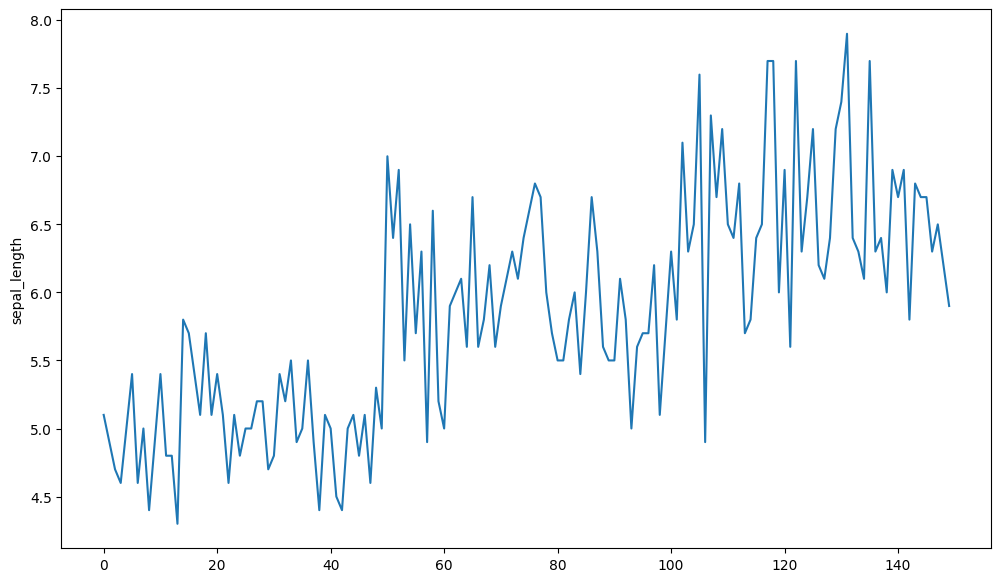

In [36]:
fig,ax=plt.subplots(figsize=(12,7));
sns.lineplot(data=df['sepal_length']);

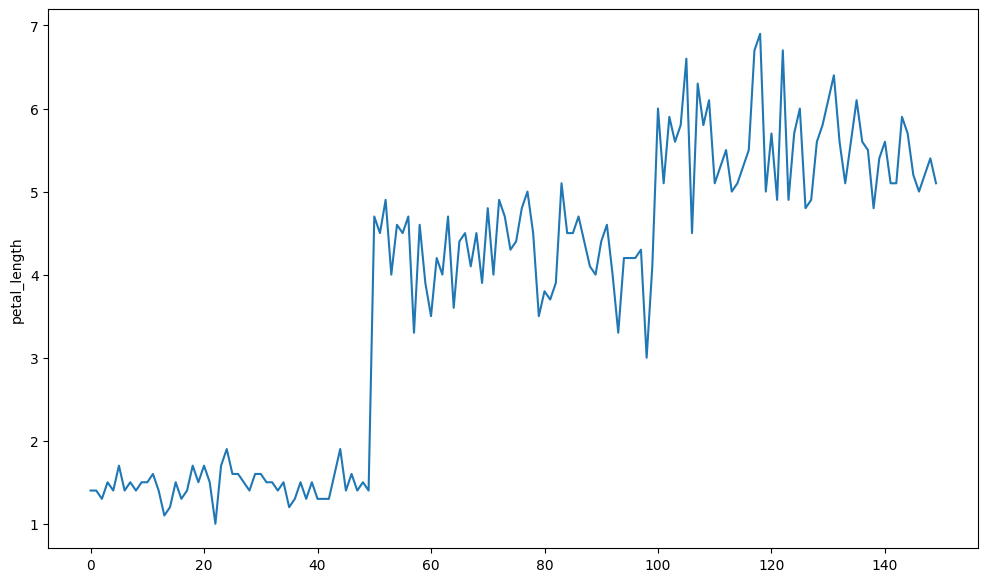

In [37]:
fig,ax=plt.subplots(figsize=(12,7));
sns.lineplot(data=df['petal_length']);

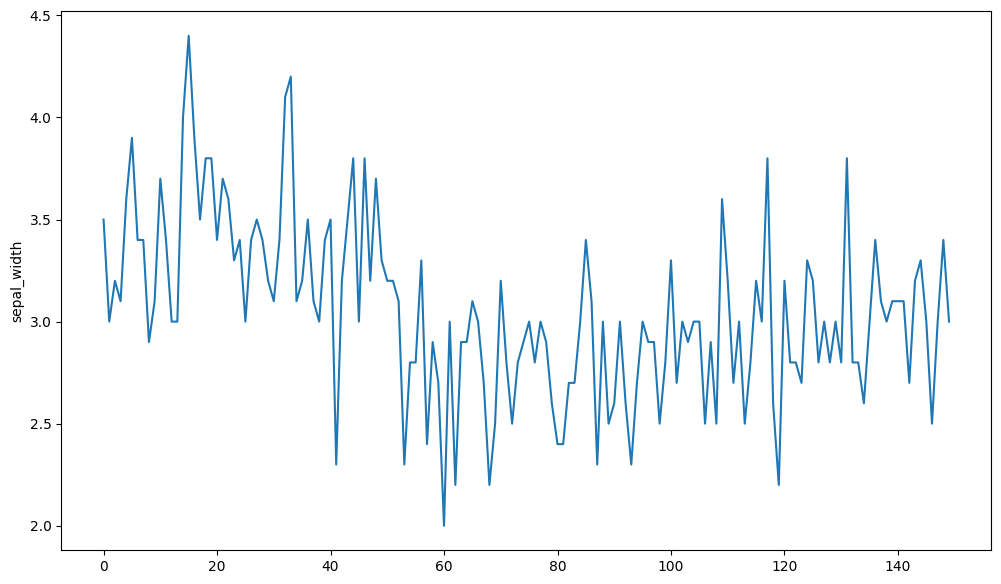

In [38]:
fig,ax=plt.subplots(figsize=(12,7));
sns.lineplot(data=df['sepal_width'],);

In [39]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## **Defining X (feature variables) and y (target variable)**

In [40]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [41]:
y=df['species']

## **Splitting Dataset into training and testing by train_test_split**

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

## ***1.Logistic Regression Model***

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pre=model.predict(X_test)

### **Model Evaluation**

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
print("Accuracy of the model by Logistic Regression is :-",accuracy_score(y_test,y_pre)*100)

Accuracy of the model by Logistic Regression is :- 95.55555555555556


In [47]:
print(confusion_matrix(y_test,y_pre))

[[13  0  0]
 [ 0 15  1]
 [ 0  1 15]]


In [48]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.94      0.94      0.94        16
           3       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## ***2.KNN***

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [50]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
y_predict=model.predict(X_test)

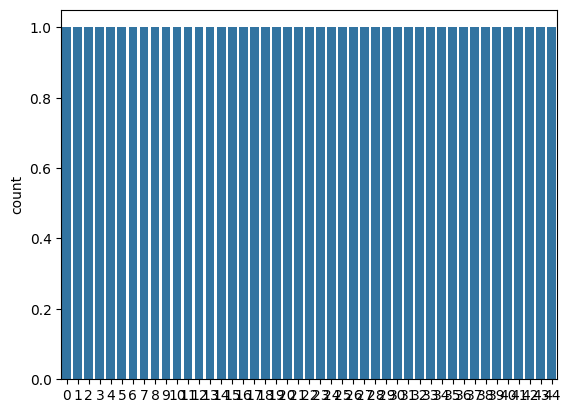

In [52]:
sns.countplot(y_predict);

### **Model Evaluation**

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
print("Accuracy of the model by KNN is :-",accuracy_score(y_test,y_predict)*100)

Accuracy of the model by KNN is :- 95.55555555555556


In [55]:
print(confusion_matrix(y_test,y_predict))

[[13  0  0]
 [ 0 15  1]
 [ 0  1 15]]


In [56]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.94      0.94      0.94        16
           3       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### **Enter Correct Details to Get Species**

In [58]:
#Manual Program
sepa_length=float(input("Enter sepal_length in float :-"))
sepa_width=float(input("Enter sepal_width in float :-"))
peta_length=float(input("Enter petal_length in float :-"))
peta_width=float(input("Enter petal_width in float :-"))
result=model.predict([[sepa_length,sepa_width,peta_length,peta_width]])
if(result==1):
  print("Species of Iris is Iris-setosa");
elif(result==2):
  print("Species of Iris is Iris-versicolor");
else:
  print("Species of Iris is Iris-virginica");

Enter sepal_length in float :-20.0
Enter sepal_width in float :-10.0
Enter petal_length in float :-10.0
Enter petal_width in float :-10.0
Species of Iris is Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
